# Vanilla GAN with Tensorflow 2.0

This is an implementation of a Generative Adversarial Network
from Ian Goodfelow's paper (https://arxiv.org/pdf/1406.2661.pdf), where the Generator and Discriminator are described by multilayer perceptrons. Several empirical techniques have been added to improve stability: <br>
- One-sided label smoothing: The discriminator has been penalised when the prediction for any real images goes beyond 0.9, by setting our target label value to be 0.9 instead of 1.0. 
- The Adam optimiser is used instead of SGD with momentum, to accelerate convergence and prevent oscillations in local minima
- Noisy images are spherical instead of linear, by sampling from gaussian rather than a uniform distribution
- The image pixels are scaled between -1 and 1, and tanh is used as the output layer for the generator
- Batch normalisation is used to further stabilise training

For more tricks, visit https://github.com/soumith/ganhacks

## 1. Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import time

## 2. Prepare the data

In [2]:
(x_train, y_train), (_,_) = tf.keras.datasets.mnist.load_data() # test data not used

print("y_train.shape",y_train.shape)
print("x_train.shape",x_train.shape)

y_train.shape (60000,)
x_train.shape (60000, 28, 28)


In [3]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_train= (x_train - 127.5)/127.5

## 3. Train the model

In [4]:
%run model.py

In [5]:
hlayers = {"g": [128, 256, 512],
           "d": [512, 256, 128]}

# if create_gif is True, sample images are stored in a new folder
# "GAN_sample_images" within the local directory and a gif is created
# from those images and saved in the local directory
gan = GAN(hlayers, epochs=200, create_gif=True)

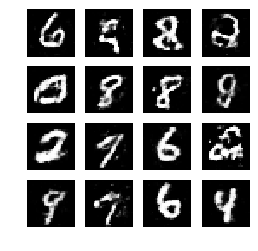

CPU times: user 1h 44min 12s, sys: 13min 39s, total: 1h 57min 52s
Wall time: 41min 28s


In [6]:
%%time
g_losses, d_losses = gan.train(x_train)